# Import Libraries 

In [2]:
import sys  # Read system parameters.

import keras  # Provide a frontend for TensorFlow.
import matplotlib as mpl  # Create 2D charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import sklearn  # Perform data mining and analysis.
import tensorflow  # Train neural networks for deep learning.
from keras import datasets
from numpy.random import seed

"""Summarize the software libraries used."""
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- scikit-learn {}".format(sklearn.__version__))
print("- TensorFlow {}".format(tensorflow.__version__))
print("- Keras {}\n".format(keras.__version__))

Libraries used in this project:
- Python 3.10.13 (main, Sep 11 2023, 08:21:04) [Clang 14.0.6 ]
- NumPy 1.26.4
- Matplotlib 3.9.2
- scikit-learn 1.5.1
- TensorFlow 2.10.0
- Keras 2.10.0



# Load the Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=10000)
print("Loaded {} training records.".format(len(X_train.data)))
print("Loaded {} test records.".format(len(X_test.data)))

Loaded 25000 training records.
Loaded 25000 test records.


**Spotlights**

- This is the complete IMDb movie review dataset consisting of 25000 review records.
- This is a Keras version that has been preprocessed, using a different method than previously applied.
- Instead of loading the entire dataset, the num_words parameter restricts it to the 10,000 most frequently used words, with any words outside this range represented by a special character.

# Explore the Data

In [7]:
"""Examine the last example's features."""

print("Features for the last example :\n")
print(X_train[-1])
print("\n")
print("Label: {}".format(y_train[-1]))

Features for the last example :

[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 2, 270, 2, 5, 2, 2, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 2, 21, 27, 9685, 6139, 5, 2, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 2, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 2, 2, 544, 5, 383, 1271, 848, 1468, 2, 497, 2, 8, 1597, 8778, 2, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]


Label: 0


**Spotlights** 

- This output highlights the characteristics derived from the last movie review.
- Each characteristic corresponds to a word in the review, listed in order of appearance.
- The numerical value assigned to each characteristic indicates the word's frequency rank within the dataset, with common words receiving lower numbers and rare words getting higher ones. The label for this example is 0, indicating a negative sentiment in a binary classification scenario, where 1 would denote a positive sentiment.

### Interpret the encoded data accurately to transform sequence values into meaningful text.

- The first and second lines will convert each numerical feature into its corresponding word by using a predefined dictionary for the dataset.
- In line six, any unfamiliar word will be substituted with a question mark (?).
- This process ensures that all numerical values are accurately represented in a more understandable format.

In [14]:
index = datasets.imdb.get_word_index()
index_dictionary = dict([(value, key) for (key, value) in index.items()])

"""To enhance clarity, substitute any unfamiliar terms with '?'."""
decoded = " ".join([index_dictionary.get(i - 3, "?") for i in X_train[-1]])

### Analyze the Output

In [15]:
print("\n", decoded)


 ? as a big fan of the original film it's hard to watch this show the ? set ? and ? ? sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter ? but his snappy wardrobe and ? apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha ? is a really bad choice the english accent and california looks can't hold a candle to barbara ? ? voice and sex appeal lee j ? tries ? to fashion barton ? but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is


**Spotlights** 

Upon reading the text, it is evident why it received a negative label.

- By examining the words alongside their numerical rankings, it becomes clear that the order is logical. For instance, the word "this" ranks 14, showing it is quite frequent, while "rob" ranks 2098, suggesting it is much rarer.
- The review's text is presented in a simplified manner, lacking punctuation and capital letters, which makes it easier for the neural network to analyze.
- Further text processing could involve eliminating stop words or extracting lemmas, but this level of analysis is adequate for the moment.


# Examine Some Summary Statistics

In [16]:
result = [len(i) for i in X_train]
print("Mean review length (in words): {:.0f}".format(np.mean(result)))
print("Standard deviation (in words): {:.0f}".format(np.std(result)))

Mean review length (in words): 239
Standard deviation (in words): 176


**Spotlights** 

- Reviews typically average about 239 words in length.
- The standard deviation is approximately 176 words.

### Plot the Average Review Length

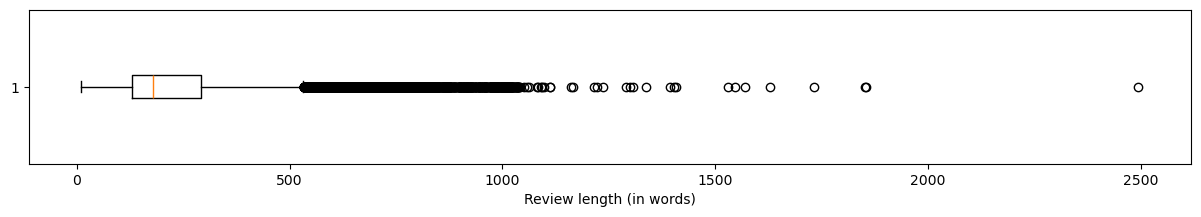

In [18]:
plt.figure(figsize=(15, 2))
plt.boxplot(result, vert=False)
plt.xlabel("Review length (in words)")
plt.show()

**Spotlights**

The box plot supports the mean and standard deviation values, indicating that most reviews fall below 500 words, which will serve as a helpful benchmark for processing the reviews.